# Capítulo 9
## Números Complejos

El uso de números complejos puede no ser familiar para muchos de Uds. en Geociencias, pero en el tratamiento de datos y series de tiempo, se usa para el análisis de Fourier, y en geofísica también es muy utilizado.

En algunos lenguajes, el uso de números complejos no es sencillo. En Fortran por ejemplo, un número complejo es estandar, mientras que en C/C++ no lo es y se requiere cargar librerías para poder trabajar con ellos. 

En Python se puede definir un número complejo usando
```
z = complex(2,3)
```
o también 
```
z = 2+3j
```
donde `j` se usa en vez de `i` en Matlab.

Un programa básico con algunos ejemplos básicos del uso de números complejos en Python se muestra:

In [92]:
"""
basic_complex.py
 Conceptos básicos de complejos en Python
"""
x  = 1
z0 = 2j
z1 = 3  + 4j
print(x)
print(z0)
print(z1)
print('Real and Imag of z1 = ',z1.real, z1.imag)


z0 =  complex(2,3)
z  = 2+3j
print(z, z0)


1
2j
(3+4j)
Real and Imag of z1 =  3.0 4.0
(2+3j) (2+3j)


### Un ejemplo
$$
\frac{3i}{5-2i} = -\frac{6}{29}+\frac{15}{29}i
$$

In [93]:
"""
div_complex.py
"""
z0 = 3j
z1 = 5-2j
z2 = z0/z1
print(z2)


(-0.20689655172413796+0.5172413793103449j)


In [33]:
"""
testcomplex.py
""" 
import numpy as np

zreal = np.random.randint(1,5)
zimag = np.random.randint(1,5)
a = complex(float(zreal),float(zimag))
b = complex(2,1)

c    = a*b
csq  = np.sqrt(c)
csin = np.sin(c)
cexp = np.exp(c)

print('# complejo a    =', a)
print('# complejo b    =', b)
print('c = a x b       =', c)
print('|c|             = %.2f' % abs(c))
print('sqrt(c)         = (%.2f, %.2fj)' %(csq.real,csq.imag))
print('sin(c)          = (%.2f, %.2fj)' %(csin.real,csin.imag))
print('exp(c)          = (%.2f, %.2fj)' %(cexp.real,cexp.imag))


# complejo a    = (1+3j)
# complejo b    = (2+1j)
c = a x b       = (-1+7j)
|c|             = 7.07
sqrt(c)         = (1.74, 2.01j)
sin(c)          = (-461.39, 296.26j)
exp(c)          = (0.28, 0.24j)


### Algunos ejemplos de números complejos
Acá otro programa con interacción del usuario para multiplicar dos números complejos



Los números complejos en Python se representan como dos pares de números en parentesis, el segundo con una `j`. Por esto, no es fácil pedir el `input` del usuario. Se solicita dos números y el programa los lee y los pone dentro de un número complejo. Cualquiera de los siguientes casos
```
1, 1
(1, 1j)
1+1j
```
producirían errores en nuestro programa

Python proporciona las funciones para unir dos números dentro de un complejo, o extraer la parte real e imaginarias de un número complejo. 

### Arreglos de números complejos 

`NumPy` tiene la capacidad de trabajar con arreglos de números complejos, lo cual puede ser de gran utilidad. Incluso las operaciones en `numpy` trabajan sin problema (o por lo menos la parte que he mirado) con arreglos complejos y sin necesidad de cargar `cmath`.

Abajo un ejemplo simple de creación de un arreglo complejo, y el uso de multiplicación matricial `matmul()` con arreglos complejos. 



In [36]:
"""
array_complex.py
""" 
import numpy as np

a = np.array([1+2j, 3+4j, 5+6j])
a = a[:, np.newaxis]
b = a.T

print('Arreglo a, shape ',np.shape(a))
print( a)
print('Arreglo b, shape ',np.shape(b))
print( b)
c = np.matmul(a,b)

print ('matmul(a*a.T)')
print(c)

c = np.matmul(a,np.conjugate(b))

print ('matmul(a*conj(a.T))')
print(c)

c = np.matmul(a,np.conjugate(b))

print ('sqrt(c)')
np.set_printoptions(precision=3)
print(np.sqrt(c))

Arreglo a, shape  (3, 1)
[[1.+2.j]
 [3.+4.j]
 [5.+6.j]]
Arreglo b, shape  (1, 3)
[[1.+2.j 3.+4.j 5.+6.j]]
matmul(a*a.T)
[[ -3. +4.j  -5.+10.j  -7.+16.j]
 [ -5.+10.j  -7.+24.j  -9.+38.j]
 [ -7.+16.j  -9.+38.j -11.+60.j]]
matmul(a*conj(a.T))
[[ 5.+0.j 11.+2.j 17.+4.j]
 [11.-2.j 25.+0.j 39.+2.j]
 [17.-4.j 39.-2.j 61.+0.j]]
sqrt(c)
[[2.236+0.j    3.33 +0.3j   4.151+0.482j]
 [3.33 -0.3j   5.   +0.j    6.247+0.16j ]
 [4.151-0.482j 6.247-0.16j  7.81 +0.j   ]]


## Fractales

Si no lo han visto, en internet se encuentran figuras muy llamativas de fractales. Uno de los sets mas famosos son el *Mandelbrot Set*, el cual es relativamente fácil de generar en un programa de computador. Para hacerlo, se requiere poder manejar números complejos en Python. 

La idea básica detrás del cálculo de fractales es que hay ciertas funciones complejas que, cuando se calculan repetidamente, pueden divergir o estar limitadas. El que divergan o no, es muy sensible a pequeños cambios en el valor del número complejo que inicia el cálculo. Esto se observa muy cerca de ciertas regiones en el plano complejo. 

Una de las imagenes más famosas de fractales es el *Mandelbrot Set*. Para generar este *set*, empezamos considerando un número complejo `c`, al cual se le aplica el siguiente algoritmo:
```
    comience con z=0 
    calcule repetidamente z = z*z + c
    verifique si |z| > 2 y cuantas repeticiones
    requirió para sobrepasar ese límite. 
```

Por ejemplo, si $c=0.3 + 0.3i$, entonces:
```
   1ra rep: z =  0.30 + 0.30i  |z| = 0.42
   2da rep: z =  0.30 + 0.48i  |z| = 0.57
   3ra rep: z =  0.16 + 0.59i  |z| = 0.61
   4ta rep: z = -0.02 + 0.49i  |z| = 0.49
```
En este caso, `z` permanecerá limitado aún hasta después de miles de iteraciones. Sin embargo, para $c=0.5 + 1.0i$:
```
   1ra iter: z =  0.50 + 1.00i  |z| = 1.10
   2da iter: z = -0.25 + 2.00i  |z| = 2.00
   3ra iter: z = -3.44 + 0.00i  |z| = 3.40
   4ta iter: z = 12.32 + 1.00i  |z| = 12.4
   5ta iter: z = 151.1 +25.63i  |z| = 153.4
```
y el valor de `z` rápidamente explota a valores infinitos. En la iteración 10 el valor seguramente ya excederá la capacidad para que un computador pueda guardar el número en memoria. Sin embargo, podemos evitar hacer estos cálculos de `z` una vez su valor absoluto exceda 2.0, ya que se puede demostrar que una vez ese valor es alcanzado, `z` tiende a diverger. 

El cálculo se realiza para una serie de valores de `c` y el resultado se grafica como función de la posición de `c` en el plano complejo (la parte real en el eje `x` la parte imaginaria en el eje `y` y el número de iteraciones como valor de amplitud). El *Mandelbrot set*, es el set de números complejos `c` para los cuales el tamaño de $z^2+c$ es finito aun después de un número infinito de iteraciones. Una buena aproximación, es por ejemplo realizar esta operación hasta un número grande de iteraciones (1000 puede ser un buen ejemplo), y asumir que si $|z|>2$, el valor va a diverger.  



### Hágalo Ud. mismo

Escriba un código para calcular el *Mandelbrot set*, donde se define de manera automática el número de puntos para el eje `x` y el eje `y` (eje de los reales e imaginarios).

Por ejemplo, siempre haga 100 puntos en `x` y 100 en `y`, para un total de 10.000 puntos (`x,y`).

También permita que el usuario defina la región (`Xmin`, `Xmax`, `Ymin`,`Ymax`) donde quiere hacer el cálculo (es como permitir hacer zoom).

Para cada punto
```
c = complex(x,y)
```
cuente el número de repeticiones que necesita hacer para que $|z|>2$. Si ha hecho más de 1000 repeticiones, pare y continue con el siguiente par de números (`x,y`).

Haga la figura a color de `x`, `y` y el número de repeticiones, que sería una matriz de 100,100 (por ejemplo con `imshow`). 

Enter x1,x2,y1,y2 -2 0.5 -0.5 2


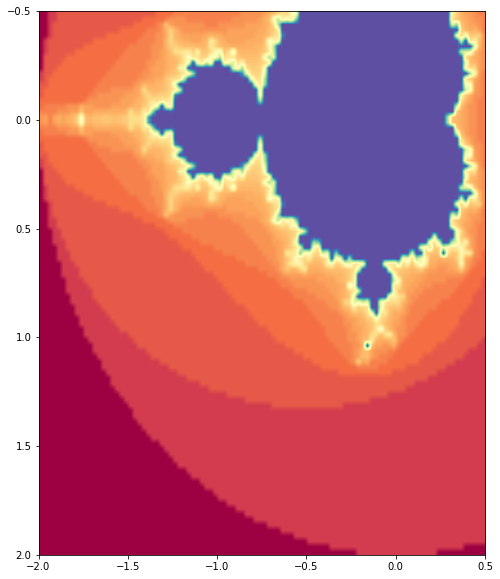

In [63]:
# mandel1.py
# Plot the mandelbrot set for a number of points
#

import numpy as np
import matplotlib.pyplot as plt

# Defina los límites X,Y 
x1,x2,y1,y2 = input("Enter x1,x2,y1,y2 ").split()
x1 = float(x1)
x2 = float(x2)
y1 = float(y1)
y2 = float(y2)

# Define grid size and start matrix
nx = 100
ny = 100
dx = (x2-x1)/float(nx)
dy = (y2-y1)/float(ny)
dat = np.zeros((nx,ny))

# Main loop for each value
for ix in range(nx):
   for iy in range(ny):
      cr = x1 + dx/2. + dx*float(ix)
      ci = y1 + dy/2. + dy*float(iy)
      # Create complex number
      c = complex(cr,ci)
      z = complex(0.0, 0.0)
      for it in range(1000):
         z = c + z*z
         if (abs(z) > 2):
            break
      dat[ix,iy] = it+1

# Rotate matrix and plot log10 scale
dat = np.transpose(dat)
zdat = np.log10(dat)

# Plot result 
fig = plt.figure(figsize=(8,10))
ax  = fig.add_subplot()
ax.imshow(zdat,interpolation='bilinear',
          extent=(x1,x2,y2,y1),cmap='Spectral')
ax.axis('equal')
ax.axis('tight')
plt.show()       


In [83]:
def mandel1(x0=-0.21503361460851339,
            y0=0.67999116792639069,
            dx=0.2):
    
    import numpy as np

    # defina la grilla
    nx  = 300
    x   = np.linspace(x0-dx,x0+dx,nx)
    y   = np.linspace(y0-dx,y0+dx,nx)
    dat = np.zeros((nx,nx))

    # Calcular Z con un loop
     # triple loop = x, y, y para calcular 1000 veces z.

    for ix in range(nx):
        for iy in range(nx):
            cr = x[ix]
            ci = y[iy]
            # create complex c
            c = complex(cr,ci)
            z = complex(0.0,0.0)
            for it in range(1000):
                z = c + z*z
                if (abs(z)>2.0):
                    break       
            dat[ix,iy] = it+1
    dat = np.transpose(dat)
    dat = np.log10(dat)

    return dat


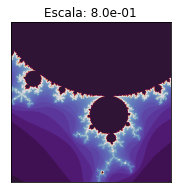

In [91]:
"""
plot_mandel.py
"""
import numpy as np
import matplotlib.pyplot as plt

# Graficar
x0 =-0.21503361460851339
y0 = 0.67999116792639069
dx = 0.4

fig = plt.figure(figsize=(10,10))
dat = mandel1(x0,y0,dx)
nx = np.shape(dat)[0]
ax = fig.add_subplot(3,3,i+1)
im = ax.imshow(dat,cmap='twilight_shifted',animated=True)
ax.set_title(f'Escala: {2*dx:.1e}')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

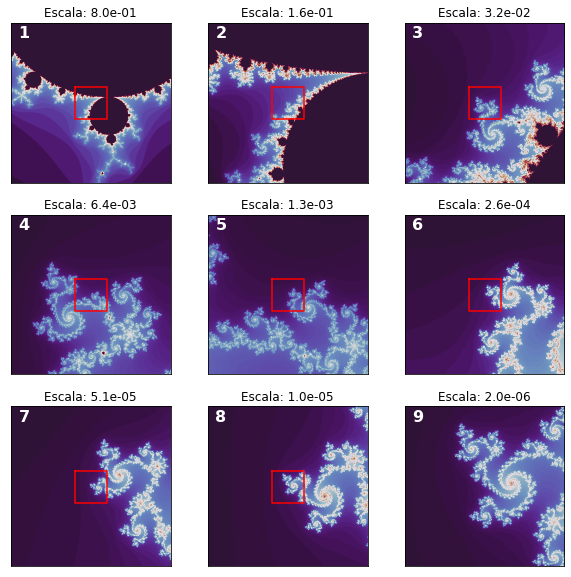

In [90]:
"""
plot_mandel_array.py
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

# Zoom factor
zfac = 5.0#625

# Graficar
x0 =-0.21503361460851339
y0 = 0.67999116792639069
dx = 0.4

fig = plt.figure(figsize=(10,10))
for i in range(9):
    dat = mandel1(x0,y0,dx)
    nx = np.shape(dat)[0]
    ax = fig.add_subplot(3,3,i+1)
    im = ax.imshow(dat,cmap='twilight_shifted',animated=True)
    ax.set_title(f'Escala: {2*dx:.1e}')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(14,28,i+1,color='white',
           fontsize = 16, fontweight ='bold')
    dx  = dx/zfac
    fac = (nx/2)/zfac     
    if (i==8):
        continue
    xbx = np.array([-fac,+fac,+fac,-fac,-fac])+nx/2
    ybx = np.array([-fac,-fac,+fac,+fac,-fac])+nx/2
    ax.plot(xbx,ybx,'r-')
 
    #dx = dx/5.0625
    #ax.plot(x0,y0,'r^')
#    ax.clear()
    
#ani = anim.ArtistAnimation(fig, ims, interval=10, blit=True,
#                                repeat_delay=1000)

#writer = anim.PillowWriter(fps=3)  
#ani.save("mandel1.gif", writer=writer)  

plt.savefig('../figs/chap09_fig1.pdf',bbox_inches='tight', pad_inches=0)
plt.show()

In [81]:
np.size(dat)

90000